In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

In [2]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [3]:
df.shape[0]

294478

In [4]:
df.user_id.nunique()

290584

In [5]:
df['converted'].sum()/290584

0.12126269856564711

In [6]:
treat_old = df.query("group == 'treatment' and landing_page == 'old_page'").shape[0]
control_new = df.query("group == 'control' and landing_page == 'new_page'").shape[0]

treat_old + control_new

3893

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


In [8]:
df2 = df.query("group == 'control' and landing_page == 'old_page'")
df2 = df2.append(df.query("group == 'treatment' and landing_page == 'new_page'"))

In [9]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

In [10]:
df2.user_id.nunique()

290584

In [11]:
df2[df2['user_id'].duplicated()]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


In [12]:
df2[df2['user_id'] == 773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


In [13]:
df2 = df2.drop(1899)

In [14]:
df2.converted.mean()

0.11959708724499628

In [15]:
c_prob = df2.query("group == 'control'")['converted'].mean()
print(c_prob)
t_prob = df2.query("group == 'treatment'")['converted'].mean()
print(t_prob)

0.1203863045004612
0.11880806551510564


In [16]:
df2.query('landing_page == "new_page"').shape[0]/df2.shape[0]

0.5000619442226688

In [17]:
p_null = df2['converted'].mean()
p_null

0.11959708724499628

In [18]:
n_new = df2.query("landing_page == 'new_page'").shape[0]
n_new

145310

In [19]:
n_old = df2.query("landing_page == 'old_page'").shape[0]
n_old

145274

In [20]:
new_page_converted = np.random.binomial(1, p_null, n_new)
old_page_converted = np.random.binomial(1, p_null, n_old)

In [21]:
new_page_converted.mean() - old_page_converted.mean()

-0.0004905724923718602

In [31]:
p_diffs = []
new_converted_simulation = np.random.binomial(n_new, p_null, 10000)/n_new
old_converted_simulation = np.random.binomial(n_old, p_null, 10000)/n_old
print(new_converted_simulation.mean())
print(old_converted_simulation.mean())
p_diffs = new_converted_simulation - old_converted_simulation
print(p_diffs.mean())

0.11959627967792995
0.11962061621487671
-2.4336536946772637e-05


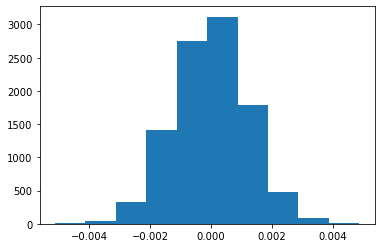

In [23]:
plt.hist(p_diffs);

obs_diff: -0.0015782389853555567
diffs_mean: -2.4336536946772637e-05
low_prob: 0.0984
high_prob: 0.0989
0.1973


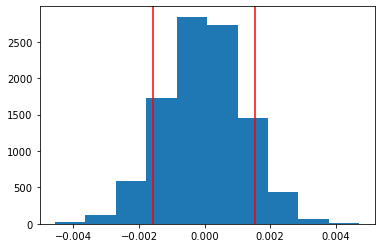

In [34]:
obs_diff = t_prob - c_prob
print("obs_diff:",obs_diff)
diffs_mean = p_diffs.mean()
print("diffs_mean:",diffs_mean)
low_prob = (p_diffs < obs_diff).mean()
print("low_prob:",low_prob)
high_prob = (p_diffs.mean() + (p_diffs.mean() - obs_diff) < p_diffs).mean()
print("high_prob:",high_prob)
plt.hist(p_diffs);
plt.axvline(obs_diff, color='red');
plt.axvline(p_diffs.mean() + (p_diffs.mean() - obs_diff), color='red');

p_val = low_prob + high_prob
print(p_val)